<a href="https://colab.research.google.com/github/ZhouEEEEEE/JSC270_Assg2/blob/shiyuan_b1/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Importing data

In [5]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

In [6]:
income94


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
income94.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##Initial data exploration

Question 1

In [8]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Question 2

In [9]:
income94.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
import numpy as np
income94 = income94.replace(' ?', np.nan)


In [11]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Question 3

(array([3.1791e+04, 5.1700e+02, 8.7000e+01, 5.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <a list of 10 Patch objects>)

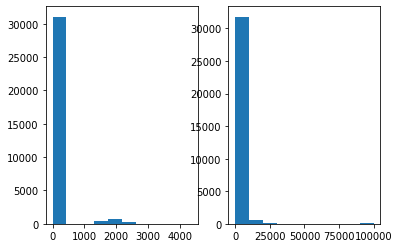

In [12]:
fig, (pltcl, pltcg) = plt.subplots(1, 2)
pltcl.hist(income94.capital_loss)
pltcg.hist(income94.capital_gain)

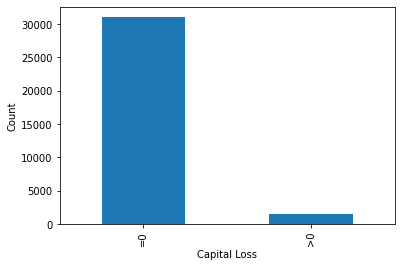

In [13]:
def f(x):
    if x > 0:
        return '>0'
    else:
        return '=0'

income94['capital_loss_cat'] = income94['capital_loss'].apply(f)
income94['capital_loss_cat'] = pd.Categorical(income94.capital_loss_cat)
income94['capital_loss_cat'].value_counts().plot(kind = 'bar')
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.show()

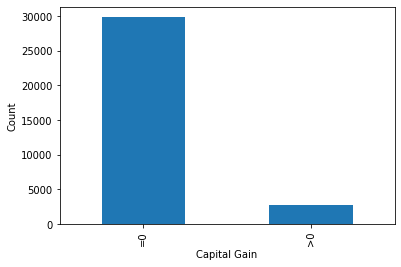

In [14]:

income94['capital_gain_cat'] = income94['capital_gain'].apply(f)
income94['capital_gain_cat'] = pd.Categorical(income94.capital_gain_cat)
income94['capital_gain_cat'].value_counts().plot(kind = 'bar')
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.show()

Question 4

(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <a list of 10 Patch objects>)

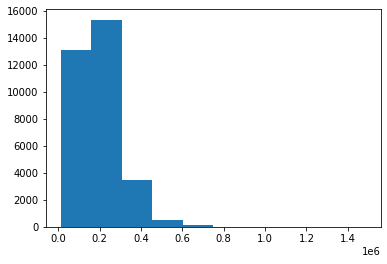

In [15]:
plt.hist(income94.fnlwgt)

In [16]:
men = income94.loc[income94['sex'] == ' Male']

In [17]:
men

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group,capital_loss_cat,capital_gain_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,=0,>0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,=0,=0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,=0,=0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,=0,=0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,=0,=0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,=0,=0
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,=0,=0
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,=0,=0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,=0,=0


(array([8.5930e+03, 1.0132e+04, 2.5790e+03, 3.8300e+02, 7.5000e+01,
        1.6000e+01, 3.0000e+00, 5.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([  13769. ,  157935.6,  302102.2,  446268.8,  590435.4,  734602. ,
         878768.6, 1022935.2, 1167101.8, 1311268.4, 1455435. ]),
 <a list of 10 Patch objects>)

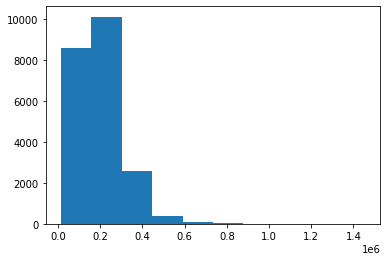

In [18]:
plt.hist(men.fnlwgt)

In [19]:
women = income94.loc[income94['sex'] == ' Female']

In [20]:
women

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group,capital_loss_cat,capital_gain_cat
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,=0,=0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,=0,=0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,=0,=0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,=0,>0
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K,=0,=0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K,=0,=0
32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K,=0,=0
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,=0,=0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,=0,=0


(array([4.430e+03, 5.127e+03, 1.044e+03, 1.230e+02, 3.100e+01, 8.000e+00,
        4.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <a list of 10 Patch objects>)

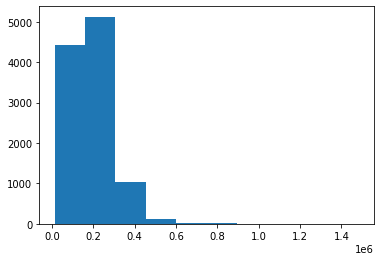

In [21]:
plt.hist(women.fnlwgt)

In [22]:
def get_outliers(num_var, df):
  '''Get outliers based on whiskers from 
  boxplot.
  Input - num_var: A string representing the v
  variable of interest
  df: The pd df containing the numerical data
  Output: A pd df containing the outlier obs
  '''
  # Capture 1st and 3rd quartiles
  firstquart = df[num_var].quantile(q=0.25)
  thirdquart = df[num_var].quantile(q=0.75)
  # Generate IQR
  iqr = thirdquart - firstquart
  # Generate Whiskers
  lower_whisker = firstquart - 1.5*iqr
  upper_whisker = thirdquart + 1.5*iqr
  # Gen outlier df
  outliers = df[(df[num_var] > upper_whisker) | (df[num_var] < lower_whisker)]
  print('The variable {} has {} outliers'.format(num_var, len(outliers)))
  return outliers

The variable fnlwgt has 617 outliers


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(array([1769., 1707., 3425., 3851., 4871., 2273., 1445., 1170.,  789.,
         490.]),
 array([ 13769. ,  54944.9,  96120.8, 137296.7, 178472.6, 219648.5,
        260824.4, 302000.3, 343176.2, 384352.1, 425528. ]),
 <a list of 10 Patch objects>)

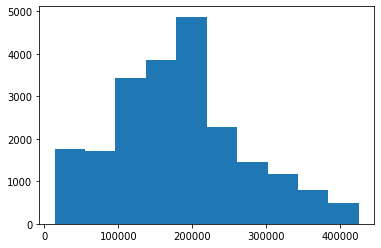

In [23]:
# save these results
outliers = get_outliers('fnlwgt', men)

# Replace the outlier values with the median of that variable
men['fnlwgt'].loc[outliers.index] = men['fnlwgt'].median()

plt.hist(men.fnlwgt)

The variable fnlwgt has 378 outliers


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(array([ 782.,  763., 1576., 1608., 2741., 1321.,  751.,  539.,  425.,
         265.]),
 array([ 12285. ,  50523.4,  88761.8, 127000.2, 165238.6, 203477. ,
        241715.4, 279953.8, 318192.2, 356430.6, 394669. ]),
 <a list of 10 Patch objects>)

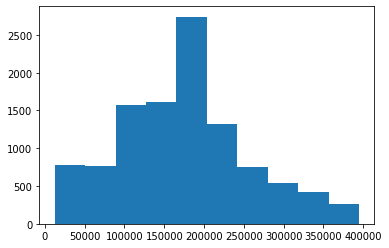

In [24]:
# save these results
outliers = get_outliers('fnlwgt', women)

# Replace the outlier values with the median of that variable
women['fnlwgt'].loc[outliers.index] = women['fnlwgt'].median()

plt.hist(women.fnlwgt)

The variable fnlwgt has 992 outliers


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


(array([2473., 2492., 5037., 5295., 7864., 3512., 2243., 1609., 1285.,
         751.]),
 array([ 12285. ,  52641.2,  92997.4, 133353.6, 173709.8, 214066. ,
        254422.2, 294778.4, 335134.6, 375490.8, 415847. ]),
 <a list of 10 Patch objects>)

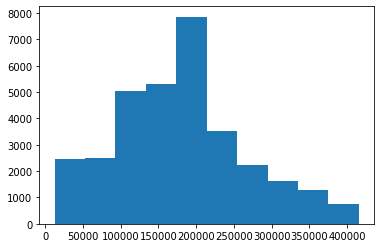

In [25]:
outliers = get_outliers('fnlwgt', income94)

# Replace the outlier values with the median of that variable
income94['fnlwgt'].loc[outliers.index] = income94['fnlwgt'].median()

plt.hist(income94.fnlwgt)

##Correlation

a)

In [26]:
income94.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.064636,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.064636,1.000000,-0.034382,0.001729,-0.002380,-0.015712
education_num,0.036527,-0.034382,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.001729,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.002380,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.015712,0.148123,0.078409,0.054256,1.000000


b)

In [28]:
stats.ttest_ind(income94.education_num, income94.hours_per_week)

Ttest_indResult(statistic=-434.3097872965163, pvalue=0.0)

c)


In [30]:
men.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.077330,0.060486,0.081893,0.059658,0.034124
fnlwgt,-0.077330,1.000000,-0.034572,0.001603,-0.001482,-0.036477
education_num,0.060486,-0.034572,1.000000,0.136189,0.085074,0.136782
capital_gain,0.081893,0.001603,0.136189,1.000000,-0.037231,0.082725
capital_loss,0.059658,-0.001482,0.085074,-0.037231,1.000000,0.055510
hours_per_week,0.034124,-0.036477,0.136782,0.082725,0.055510,1.000000


In [31]:
women.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.041664,-0.017899,0.056513,0.041708,0.081257
fnlwgt,-0.041664,1.000000,-0.033969,-0.002495,-0.019924,0.006238
education_num,-0.017899,-0.033969,1.000000,0.076924,0.063829,0.178749
capital_gain,0.056513,-0.002495,0.076924,1.000000,-0.020720,0.028580
capital_loss,0.041708,-0.019924,0.063829,-0.020720,1.000000,0.018379
hours_per_week,0.081257,0.006238,0.178749,0.028580,0.018379,1.000000


d)


In [32]:
reg1 = smf.ols('hours_per_week ~ education_num', data = income94).fit()
print(reg1.summary())


                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     730.4
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          4.24e-159
Time:                        12:24:59   Log-Likelihood:            -1.2768e+05
No. Observations:               32561   AIC:                         2.554e+05
Df Residuals:                   32559   BIC:                         2.554e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        33.2711      0.274    121.575

In [72]:
def weighted_var(values, weights):
  average = np.average(values, weights = weights)
  return np.average((values-average)**2, weights = weights)


In [73]:
weight_var = weighted_var(income94.education_num, income94.fnlwgt)
print("The weighted variance of education_num is", weight_var)
var_edu = np.var(income94.education_num)
print("The unweighted variance of education_num is", var_edu)
print("The weighted variance of hours_per_week is", weighted_var(income94.hours_per_week, income94.fnlwgt))
print("The unweighted variance of hours_per_week is", np.var((income94.hours_per_week)))
arr = np.cov(income94.education_num, income94.hours_per_week)
print("The unweighted covariance between education_num and hours_per_week is", arr[0][1])
arr1 = np.cov(income94.education_num, income94.hours_per_week, fweights=income94.fnlwgt)
print("The weighted covariance between education_num and hours_per_week is", arr1[0][1])

The weighted variance of education_num is 6.769129922072463
The unweighted variance of education_num is 6.618686630416274
The weighted variance of hours_per_week is 147.15518745516582
The unweighted variance of hours_per_week is 152.45431279266475
The unweighted covariance between education_num and hours_per_week is 4.705337944611544
The weighted covariance between education_num and hours_per_week is 4.650096494746168


##Regression

a)

In [39]:
income94['sex_num'] = (income94.sex == ' Male').astype(int)
income94.sex_num.value_counts()
reg2 = smf.ols('hours_per_week ~ sex_num', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:24:59   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4104      0.116    314.412      0.0

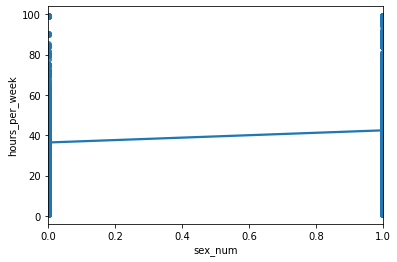

In [40]:
sns.regplot(x='sex_num', y='hours_per_week', data=income94)

b)

In [41]:
income94['sex_num'] = (income94.sex == ' Male').astype(int)
income94.sex_num.value_counts()
reg3 = smf.ols('hours_per_week ~ sex_num + education_num', data = income94).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:25:03   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

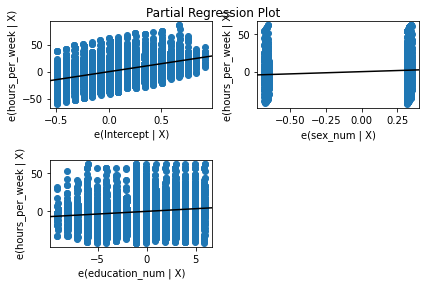

In [43]:
fig = sm.graphics.plot_partregress_grid(reg3)
fig.tight_layout(pad = 1.0)

c)

In [51]:
reg_mult = smf.ols('hours_per_week ~ sex_num + education_num + gross_income_group', data = income94).fit()

print(reg_mult.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:53:56   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [45]:
def rss(predictions, real):
  return sum((predictions - real) ** 2)

In [57]:
reg_uni_s = smf.ols('hours_per_week ~ sex_num', data = income94).fit()
reg_uni_e = smf.ols('hours_per_week ~ education_num', data = income94).fit()
reg_uni_g = smf.ols('hours_per_week ~ gross_income_group', data = income94).fit()
reg_bi_se = smf.ols('hours_per_week ~ education_num + sex_num', data = income94).fit()
reg_bi_sg = smf.ols('hours_per_week ~ sex_num + gross_income_group', data = income94).fit()
reg_bi_eg = smf.ols('hours_per_week ~ education_num + gross_income_group', data = income94).fit()


In [54]:
rss_uni_s = rss(reg_uni_s.predict(), income94.hours_per_week)
rss_uni_e = rss(reg_uni_e.predict(), income94.hours_per_week)
rss_uni_g = rss(reg_uni_g.predict(), income94.hours_per_week)

print("RSS of one-variable model with sex_num:", rss_uni_s)
print("RSS of one-variable model with education_num:", rss_uni_e)
print("RSS of one-variable model with gross_income_group:", rss_uni_g)


RSS of one-variable model with sex_num: 4703041.014893429
RSS of one-variable model with education_num: 4855151.5881620385
RSS of one-variable model with gross_income_group: 4702175.375989104


In [58]:
rss_bi_se = rss(reg_bi_se.predict(), income94.hours_per_week)
rss_bi_sg = rss(reg_bi_sg.predict(), income94.hours_per_week)
rss_bi_eg = rss(reg_bi_eg.predict(), income94.hours_per_week)

print("RSS of two-variable model with sex_num & education_num:", rss_bi_se)
print("RSS of two-variable model with sex_num & gross_income_group:", rss_bi_sg)
print("RSS of two-variable model with education_num & gross_income_group:", rss_bi_eg)

RSS of two-variable model with sex_num & education_num: 4598213.6073407605
RSS of two-variable model with sex & gross_income_group: 4534030.257034701
RSS of two-variable model with education_num & gross_income_group: 4673872.441406014


In [59]:
rss3 = rss(reg4.predict(), income94.hours_per_week)
print("RSS of three-variables model:", rss3)

RSS of three-variables model: 4495831.606240931
